## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,    
    confusion_matrix
)

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

RAND=15

warnings.filterwarnings("ignore")

# Import and load Dataset

In [2]:
print(os.getcwd())
os.listdir()

C:\Users\pratham\OneDrive\Desktop\old sem


['.ipynb_checkpoints',
 'ALL ml',
 'c++',
 'car price prediction.ipynb',
 'cirrhosis.csv',
 'cirrhosis.ipynb',
 'college exp',
 'fastai.ipynb',
 'Liver disease detection-Copy1.ipynb',
 'Liver disease detection.ipynb',
 'liver images dataset.ipynb',
 'LPD.csv',
 'MATERIALS AND METHODOLOGY.docx',
 'newlpd.csv',
 'RESULT AND DISCUSSIONS.docx',
 'test.csv.xlsx']

In [3]:
df=pd.read_csv('LPD.csv',encoding='unicode_escape')
df.head()
df.shape

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


(30691, 11)

# Renaming Columns

In [4]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [5]:
d = {'Age of the patient':'age','Gender of the patient':'gender','Total Bilirubin':'TB','Direct Bilirubin':'DB',
     '\xa0Alkphos Alkaline Phosphotase':'AAP','\xa0Sgpt Alamine Aminotransferase':'SgptAA',
     'Sgot Aspartate Aminotransferase':'SgotAA','Total Protiens':'TP','\xa0ALB Albumin':'ALBA',
     'A/G Ratio Albumin and Globulin Ratio':'A/G ratio','Result':'target'}

In [6]:
df.rename(columns=d, inplace=True)

# Label Encoding

In [7]:
d_target = {1: 1, 2: 0}

In [8]:
df.replace({'target': d_target}, inplace=True)

In [9]:
df.target.value_counts()

1    21917
0     8774
Name: target, dtype: int64

In [10]:
df.gender.value_counts()

Male      21986
Female     7803
Name: gender, dtype: int64

In [11]:
df.shape

(30691, 11)

In [12]:
df.head()

,age,gender,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,target
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


# Separating Numerical and Categorical columns

In [13]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include=[object])
num_cols = df_num.columns.values[:-1]
cat_cols = df_cat.columns.values

In [14]:
num_cols
cat_cols

array(['age', 'TB', 'DB', 'AAP', 'SgptAA', 'SgotAA', 'TP', 'ALBA',
       'A/G ratio'], dtype=object)

array(['gender'], dtype=object)

# Normalizing Numerical Columns

In [15]:
norm_target = (df.target.value_counts(normalize=True).mul(100).rename("percent").reset_index())

# Exploratory Data Analysis

Text(0.5, 0.98, 'Target')

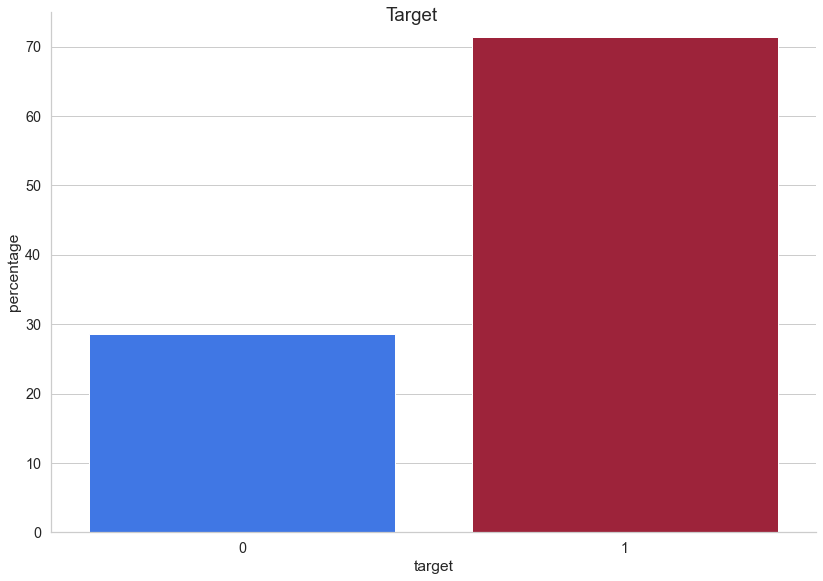

In [16]:
custom_colors = ["#256EFF","#B10F2E"]
sns.set_theme(style="whitegrid", palette=custom_colors, context="notebook", font_scale=1.3)
ax = sns.catplot(data=norm_target, x="index", y="percent",
    height=8.27, aspect=11.7 / 8.27, kind="bar")
ax.set_axis_labels("target", "percentage")
ax.fig.suptitle("Target")

<AxesSubplot:xlabel='gender', ylabel='count'>

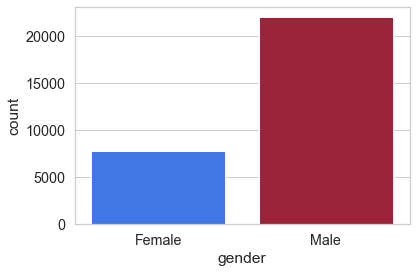

In [17]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='target', ylabel='count'>

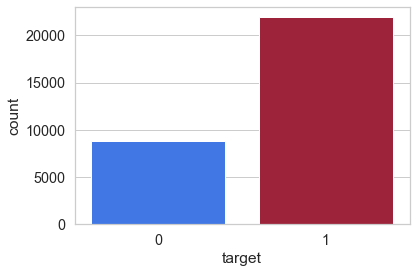

In [18]:
sns.countplot(df['target'])

In [19]:
corr_df = df[num_cols]
cor = corr_df.corr(method='pearson')

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Plot')

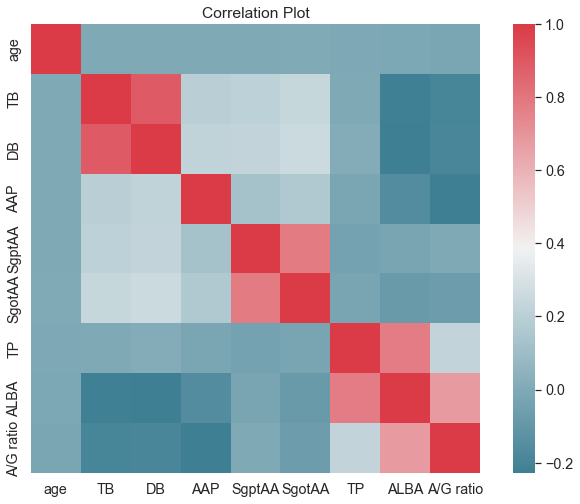

In [20]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(cor, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
plt.title("Correlation Plot")

In [21]:
df.describe()

,age,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,target
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,0.714118
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        30689 non-null  float64
 1   gender     29789 non-null  object 
 2   TB         30043 non-null  float64
 3   DB         30130 non-null  float64
 4   AAP        29895 non-null  float64
 5   SgptAA     30153 non-null  float64
 6   SgotAA     30229 non-null  float64
 7   TP         30228 non-null  float64
 8   ALBA       30197 non-null  float64
 9   A/G ratio  30132 non-null  float64
 10  target     30691 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


In [23]:
df.isna().sum().sort_values(ascending=False)
df.shape

gender       902
AAP          796
TB           648
DB           561
A/G ratio    559
SgptAA       538
ALBA         494
TP           463
SgotAA       462
age            2
target         0
dtype: int64

(30691, 11)

# Hanling Duplicate Rows

In [24]:
duplicate_rows_df = df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [25]:
df.isna().sum().sort_values(ascending=False)
df.shape

gender       796
AAP          694
TB           557
DB           490
SgptAA       459
A/G ratio    436
ALBA         413
SgotAA       393
TP           370
age            1
target         0
dtype: int64

(19368, 11)

# Removing outliers

In [26]:
for col in num_cols:
    Q1, Q3 = df.loc[:,col].quantile([0.25,0.75]).values
    IQR = Q3-Q1
    box_max = Q3+(1.5*IQR)
    box_min = Q1-(1.5*IQR)
    df.loc[df[col]<box_min, col] = np.NaN
    df.loc[df[col]>box_max, col] = np.NaN

In [27]:
df.isna().sum().sort_values(ascending=False)
df.shape

TB           3302
DB           3170
SgptAA       2833
AAP          2806
SgotAA       2613
gender        796
A/G ratio     781
TP            630
ALBA          413
age            52
target          0
dtype: int64

(19368, 11)

In [28]:
df.isna().mean().mul(100).sort_values(ascending=False)

TB           17.048740
DB           16.367204
SgptAA       14.627220
AAP          14.487815
SgotAA       13.491326
gender        4.109872
A/G ratio     4.032425
TP            3.252788
ALBA          2.132383
age           0.268484
target        0.000000
dtype: float64

In [29]:
num_cols

array(['age', 'TB', 'DB', 'AAP', 'SgptAA', 'SgotAA', 'TP', 'ALBA',
       'A/G ratio'], dtype=object)

# Filling Null values with mean value and Dropping the remaing values

In [30]:
for col in num_cols:
    if df[col].isna().mean()*100 < 15:
        cur_mean = np.mean(df[col])
        df[col] = df[col].fillna(cur_mean)

In [31]:
df.isna().mean().mul(100).sort_values(ascending=False)
df.shape

TB           17.048740
DB           16.367204
gender        4.109872
age           0.000000
AAP           0.000000
SgptAA        0.000000
SgotAA        0.000000
TP            0.000000
ALBA          0.000000
A/G ratio     0.000000
target        0.000000
dtype: float64

(19368, 11)

In [32]:
df.dropna(inplace=True)

In [33]:
df.shape

(15208, 11)

In [34]:
df.head()

,age,gender,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,target
0,65.0,Female,0.7,0.1,187.0,16.000000,18.0,6.8,3.3,0.9,1
3,58.0,Male,1.0,0.4,182.0,14.000000,20.0,6.8,3.4,1.0,1
4,72.0,Male,3.9,2.0,195.0,27.000000,59.0,7.3,2.4,0.4,1
5,46.0,Male,1.8,0.7,208.0,19.000000,14.0,7.6,4.4,1.3,1
6,26.0,Female,0.9,0.2,154.0,38.274569,12.0,7.0,3.5,1.0,1


In [35]:
df.isna().mean().mul(100).sort_values(ascending=False)
df.shape

age          0.0
gender       0.0
TB           0.0
DB           0.0
AAP          0.0
SgptAA       0.0
SgotAA       0.0
TP           0.0
ALBA         0.0
A/G ratio    0.0
target       0.0
dtype: float64

(15208, 11)

# Handling Imbalanced Dataset using Undersampling technique

<AxesSubplot:xlabel='target', ylabel='count'>

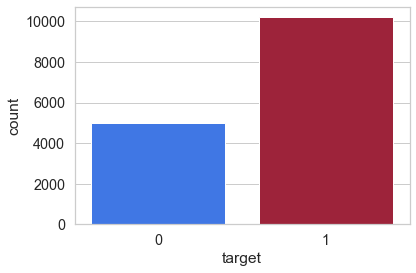

In [36]:
sns.countplot(df['target'])

In [37]:
miniority_class_len=len(df[df['target']==0])
print(miniority_class_len)

5002


In [38]:
majority_class_indeces=df[df['target']==1].index
print(majority_class_indeces)

Int64Index([    0,     3,     4,     5,     6,     7,     9,    10,    11,
               13,
            ...
            29885, 29889, 29890, 29891, 29892, 29894, 29974, 29976, 30686,
            30689],
           dtype='int64', length=10206)


In [39]:
df2=df.loc[majority_class_indeces]

In [40]:
random_indeces=np.random.choice(majority_class_indeces,
                               miniority_class_len,
                               replace=False)
print(len(random_indeces))

5002


In [41]:
miniority_class_indeces=df[df['target']==0].index
print(miniority_class_indeces)

Int64Index([    8,    12,    15,    17,    24,    28,    29,    32,    33,
               36,
            ...
            29866, 29867, 29872, 29874, 29876, 29881, 29882, 29883, 29884,
            29893],
           dtype='int64', length=5002)


In [42]:
under_sampling_indeces=np.concatenate([miniority_class_indeces,random_indeces])

In [43]:
under_sample=df.loc[under_sampling_indeces]

<AxesSubplot:xlabel='target', ylabel='count'>

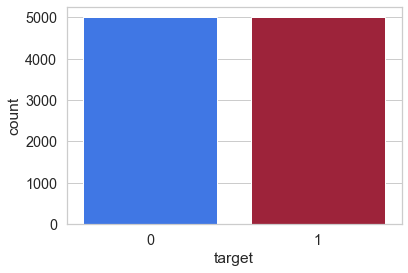

In [44]:
sns.countplot(x='target',data=under_sample)

In [45]:
df=under_sample

# Separating X and Y columns for test and train data

In [46]:
X = df.drop(['target'], axis=1)
y = df.target

# Scaling the Numerical Data

In [47]:
df_norm = StandardScaler().fit_transform(df[num_cols])

In [48]:
df1= pd.DataFrame(data=df_norm, columns=num_cols)

In [49]:
df1[cat_cols]= df[cat_cols].values

In [50]:
df.head()

,age,gender,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,target
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.200000,0
12,64.0,Male,0.9,0.3,310.0,61.0,58.0,7.0,3.4,0.900000,0
15,25.0,Male,0.6,0.1,183.0,91.0,53.0,5.5,2.3,0.700000,0
17,33.0,Male,1.6,0.5,165.0,15.0,23.0,7.3,3.5,0.920000,0
24,63.0,Male,0.9,0.2,194.0,52.0,45.0,6.0,3.9,0.925026,0


In [51]:
df=df1
df.head()

,age,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,gender
0,-1.619769,-0.405307,-0.348314,-0.142100,-0.666692,-0.802482,0.825495,1.075024,0.851703,Male
1,1.244677,-0.405307,-0.348314,1.424305,1.360592,0.426730,0.438439,0.179175,-0.284355,Male
2,-1.132204,-0.741499,-0.749319,-0.417671,2.920040,0.269139,-1.013024,-1.228588,-1.041727,Male
3,-0.644638,0.379140,0.052691,-0.678738,-1.030563,-0.676409,0.728731,0.307153,-0.208618,Male
4,1.183731,-0.405307,-0.548816,-0.258130,0.892757,0.016993,-0.529203,0.819067,-0.189585,Male


# Getting Dummy values for Categorical columns

In [52]:
df_enc = pd.get_dummies(df, columns=cat_cols)
df_enc.head()

,age,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,gender_Female,gender_Male
0,-1.619769,-0.405307,-0.348314,-0.142100,-0.666692,-0.802482,0.825495,1.075024,0.851703,0,1
1,1.244677,-0.405307,-0.348314,1.424305,1.360592,0.426730,0.438439,0.179175,-0.284355,0,1
2,-1.132204,-0.741499,-0.749319,-0.417671,2.920040,0.269139,-1.013024,-1.228588,-1.041727,0,1
3,-0.644638,0.379140,0.052691,-0.678738,-1.030563,-0.676409,0.728731,0.307153,-0.208618,0,1
4,1.183731,-0.405307,-0.548816,-0.258130,0.892757,0.016993,-0.529203,0.819067,-0.189585,0,1


In [53]:
df_enc.head().values
y.head().values

array([[-1.6197689 , -0.4053072 , -0.34831387, -0.1420996 , -0.66669155,
        -0.80248216,  0.82549536,  1.07502418,  0.85170299,  0.        ,
         1.        ],
       [ 1.24467708, -0.4053072 , -0.34831387,  1.42430547,  1.36059173,
         0.42673013,  0.43843857,  0.17917488, -0.28435514,  0.        ,
         1.        ],
       [-1.13220362, -0.74149866, -0.74931875, -0.41767086,  2.9200404 ,
         0.26913881, -1.01302436, -1.22858829, -1.04172723,  0.        ,
         1.        ],
       [-0.64463835,  0.37913955,  0.05269102, -0.67873837, -1.03056291,
        -0.6764091 ,  0.72873116,  0.30715335, -0.20861793,  0.        ,
         1.        ],
       [ 1.18373142, -0.4053072 , -0.54881631, -0.2581296 ,  0.89275712,
         0.0169927 , -0.52920338,  0.81906723, -0.18958482,  0.        ,
         1.        ]])

array([0, 0, 0, 0, 0], dtype=int64)

In [54]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)

In [55]:
for ind, t_index in enumerate(kf.split(df_enc.values, y.values)):
    print(ind+1)
    print("TRAIN:", t_index[0], "TEST:", t_index[1])
    X_train_cur, X_test_cur = df_enc.values[t_index[0]], df_enc.values[t_index[1]]
    y_train_cur, y_test_cur = y.values[t_index[0]], y.values[t_index[1]]

1
TRAIN: [    0     2     3 ... 10000 10001 10002] TEST: [    1     7     8 ...  9994  9995 10003]
2
TRAIN: [    1     4     7 ... 10001 10002 10003] TEST: [   0    2    3 ... 9992 9993 9999]
3
TRAIN: [    0     1     2 ...  9995  9999 10003] TEST: [    4     9    11 ... 10000 10001 10002]


In [56]:
conf_mat_list = []

## MODELS

## LR

In [57]:
df.shape

(10004, 10)

In [58]:
lr_parameters_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": np.linspace(1, 1000, num=5),
    "solver": ["sag", "saga", "lbfgs"],
    "l1_ratio": [0.25, 0.5, 0.75],
    "max_iter": np.arange(100, 500, 100),
}

In [59]:
lr = LogisticRegression(class_weight='balanced')
cross_val = StratifiedKFold(n_splits=3, shuffle=True)
lr_grid_cv = GridSearchCV(lr, lr_parameters_grid, scoring='roc_auc', cv=cross_val, verbose=2)

In [60]:
lr_best_params = {'C': 750.25,
                  'l1_ratio': 0.25,
                  'max_iter': 200,
                  'penalty': 'elasticnet',
                  'solver': 'saga'}
lr_best_score = 0.7017821204054296

In [61]:
lr_gr = LogisticRegression(**lr_best_params, class_weight="balanced")
acc=[]
precs = []
recs = []
f1s = []
ras = []

for ind, t_index in enumerate(kf.split(df_enc.values, y.values)):
    print(ind+1)
    print("TRAIN:", t_index[0], "TEST:", t_index[1])
    X_train_cur, X_test_cur = df_enc.values[t_index[0]], df_enc.values[t_index[1]]
    y_train_cur, y_test_cur = y.values[t_index[0]], y.values[t_index[1]]
    
    lr_gr.fit(X_train_cur, y_train_cur)
    
    lr_y_pred = lr_gr.predict(X_test_cur)
    lr_y_score = lr_gr.predict_proba(X_test_cur)[:, 1]
    
    acc.append(accuracy_score(y_test_cur, lr_y_pred))
    precs.append(precision_score(y_test_cur, lr_y_pred))
    recs.append(recall_score(y_test_cur, lr_y_pred))
    f1s.append(f1_score(y_test_cur, lr_y_pred))
    ras.append(roc_auc_score(y_test_cur, lr_y_score))
conf_mat_list.append(y_test_cur)
conf_mat_list.append(lr_y_pred)

1
TRAIN: [    0     2     3 ... 10000 10001 10002] TEST: [    1     7     8 ...  9994  9995 10003]


LogisticRegression(C=750.25, class_weight='balanced', l1_ratio=0.25,
                   max_iter=200, penalty='elasticnet', solver='saga')

2
TRAIN: [    1     4     7 ... 10001 10002 10003] TEST: [   0    2    3 ... 9992 9993 9999]


LogisticRegression(C=750.25, class_weight='balanced', l1_ratio=0.25,
                   max_iter=200, penalty='elasticnet', solver='saga')

3
TRAIN: [    0     1     2 ...  9995  9999 10003] TEST: [    4     9    11 ... 10000 10001 10002]


LogisticRegression(C=750.25, class_weight='balanced', l1_ratio=0.25,
                   max_iter=200, penalty='elasticnet', solver='saga')

In [62]:
precs, recs, f1s, ras

([0.6766205389657683, 0.7043618739903069, 0.6928251121076233],
 [0.5572885422915417, 0.5227817745803357, 0.5560887822435513],
 [0.6111842105263158, 0.6001376462491397, 0.6169717138103161],
 [0.6952019668008844, 0.703814992397204, 0.700509808056385])

In [63]:
metrics = pd.DataFrame(index=['acc','precision', 'recall', 'f1', 'roc-auc'])

metrics["lr"] = [
    np.mean(acc),
    np.mean(precs),
    np.mean(recs),
    np.mean(f1s),
    np.mean(ras)
]

# KNN

In [64]:
knn_parameters_grid = {
    "n_neighbors": np.arange(3, 10, 1),
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, knn_parameters_grid, scoring='roc_auc', cv=cross_val, verbose=2)
knn_best_params = {'algorithm': 'ball_tree', 'leaf_size': 20, 
                   'n_neighbors': 4, 'p': 1}
knn_best_score = 0.9958725277478756

In [65]:
knn_gr = KNeighborsClassifier(**knn_best_params)
acc=[]
precs = []
recs = []
f1s = []
ras = []

for train_index, test_index in kf.split(df_enc.values, y.values):
    X_train_cur, X_test_cur = df_enc.values[train_index], df_enc.values[test_index]
    y_train_cur, y_test_cur = y.values[train_index], y.values[test_index]
    
    knn_gr.fit(X_train_cur, y_train_cur)
    
    knn_y_pred = knn_gr.predict(X_test_cur)
    knn_y_score = knn_gr.predict_proba(X_test_cur)[:, 1]
    
    acc.append(accuracy_score(y_test_cur, knn_y_pred))
    precs.append(precision_score(y_test_cur, knn_y_pred))
    recs.append(recall_score(y_test_cur, knn_y_pred))
    f1s.append(f1_score(y_test_cur, knn_y_pred))
    ras.append(roc_auc_score(y_test_cur, knn_y_score))
conf_mat_list.append(y_test_cur)
conf_mat_list.append(knn_y_pred)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=4, p=1)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=4, p=1)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=4, p=1)

In [66]:
metrics["knn"] = [
    np.mean(acc),
    np.mean(precs),
    np.mean(recs),
    np.mean(f1s),
    np.mean(ras)
]

# SVM

In [67]:
svm_gr = SVC(probability=True)
acc=[]
precs = []
recs = []
f1s = []
ras = []

for train_index, test_index in kf.split(df_enc.values, y.values):
    X_train_cur, X_test_cur = df_enc.values[train_index], df_enc.values[test_index]
    y_train_cur, y_test_cur = y.values[train_index], y.values[test_index]
    svm_gr.fit(X_train_cur, y_train_cur)
    
    svm_y_pred = svm_gr.predict(X_test_cur)
    svm_y_score = svm_gr.predict_proba(X_test_cur)[:, 1]
    
    acc.append(accuracy_score(y_test_cur, svm_y_pred))
    precs.append(precision_score(y_test_cur, svm_y_pred))
    recs.append(recall_score(y_test_cur, svm_y_pred))
    f1s.append(f1_score(y_test_cur, svm_y_pred))
    ras.append(roc_auc_score(y_test_cur, svm_y_score))
conf_mat_list.append(y_test_cur)
conf_mat_list.append(svm_y_pred)

SVC(probability=True)

SVC(probability=True)

SVC(probability=True)

In [68]:
metrics["svm"] = [
    np.mean(acc),
    np.mean(precs),
    np.mean(recs),
    np.mean(f1s),
    np.mean(ras)
]

# Naive bayes

In [69]:
nb_gr = GaussianNB()
acc=[]
precs = []
recs = []
f1s = []
ras = []

for train_index, test_index in kf.split(df_enc.values, y.values):
    X_train_cur, X_test_cur = df_enc.values[train_index], df_enc.values[test_index]
    y_train_cur, y_test_cur = y.values[train_index], y.values[test_index]
    
    nb_gr.fit(X_train_cur, y_train_cur)
    
    nb_y_pred = nb_gr.predict(X_test_cur)
    svm_y_score = nb_gr.predict_proba(X_test_cur)[:, 1]
    
    acc.append(accuracy_score(y_test_cur, nb_y_pred))
    precs.append(precision_score(y_test_cur, nb_y_pred))
    recs.append(recall_score(y_test_cur, nb_y_pred))
    f1s.append(f1_score(y_test_cur, nb_y_pred))
    ras.append(roc_auc_score(y_test_cur, svm_y_score))
conf_mat_list.append(y_test_cur)
conf_mat_list.append(nb_y_pred)

GaussianNB()

GaussianNB()

GaussianNB()

In [70]:
metrics["nb"] = [
    np.mean(acc),
    np.mean(precs),
    np.mean(recs),
    np.mean(f1s),
    np.mean(ras)
]

# Decision Tree

In [71]:
dtree_parameters_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4, 5]
}
dtree = DecisionTreeClassifier()
dtree_grid_cv = GridSearchCV(dtree, dtree_parameters_grid, scoring='roc_auc', cv=cross_val, verbose=2)
dtree_best_params = {'max_leaf_nodes': 99, 'min_samples_split': 5}
dtree_best_score = 0.9845440046568043

In [72]:
dtree_gr = DecisionTreeClassifier(**dtree_best_params)
acc=[]
precs = []
recs = []
f1s = []
ras = []

for train_index, test_index in kf.split(df_enc.values, y.values):
    X_train_cur, X_test_cur = df_enc.values[train_index], df_enc.values[test_index]
    y_train_cur, y_test_cur = y.values[train_index], y.values[test_index]
    
    dtree_gr.fit(X_train_cur, y_train_cur)
    
    dtree_y_pred = dtree_gr.predict(X_test_cur)
    dtree_y_score = dtree_gr.predict_proba(X_test_cur)[:, 1]
    
    acc.append(accuracy_score(y_test_cur, dtree_y_pred))
    precs.append(precision_score(y_test_cur, dtree_y_pred))
    recs.append(recall_score(y_test_cur, dtree_y_pred))
    f1s.append(f1_score(y_test_cur, dtree_y_pred))
    ras.append(roc_auc_score(y_test_cur, dtree_y_score))
conf_mat_list.append(y_test_cur)
conf_mat_list.append(dtree_y_pred)

DecisionTreeClassifier(max_leaf_nodes=99, min_samples_split=5)

DecisionTreeClassifier(max_leaf_nodes=99, min_samples_split=5)

DecisionTreeClassifier(max_leaf_nodes=99, min_samples_split=5)

In [73]:
metrics["dtree"] = [
    np.mean(acc),
    np.mean(precs),
    np.mean(recs),
    np.mean(f1s),
    np.mean(ras)
]

# Random Forest 

In [74]:
random_forest_parameters_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
random_forest = RandomForestClassifier()
random_forest_grid_cv = GridSearchCV(random_forest, random_forest_parameters_grid, 
                                     scoring='roc_auc', cv=cross_val, verbose=2)
random_forest_best_params = {'criterion': 'gini',
                             'max_depth': 8,
                             'max_features': 'sqrt',
                             'n_estimators': 500}
random_forest_best_score = 0.9935726915880597

In [75]:
random_forest_gr = RandomForestClassifier(**random_forest_best_params)
acc=[]
precs = []
recs = []
f1s = []
ras = []

for train_index, test_index in kf.split(df_enc.values, y.values):
    X_train_cur, X_test_cur = df_enc.values[train_index], df_enc.values[test_index]
    y_train_cur, y_test_cur = y.values[train_index], y.values[test_index]
    
    random_forest_gr.fit(X_train_cur, y_train_cur)
    
    random_forest_y_pred = random_forest_gr.predict(X_test_cur)
    random_forest_y_score = random_forest_gr.predict_proba(X_test_cur)[:, 1]
    
    acc.append(accuracy_score(y_test_cur, random_forest_y_pred))
    precs.append(precision_score(y_test_cur, random_forest_y_pred))
    recs.append(recall_score(y_test_cur, random_forest_y_pred))
    f1s.append(f1_score(y_test_cur, random_forest_y_pred))
    ras.append(roc_auc_score(y_test_cur, random_forest_y_score))
conf_mat_list.append(y_test_cur)
conf_mat_list.append(random_forest_y_pred)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)

In [76]:
metrics["random_forest"] = [
    np.mean(acc),
    np.mean(precs),
    np.mean(recs),
    np.mean(f1s),
    np.mean(ras)
]

# XG BOOST

In [77]:
xgb_gr = xgboost.XGBClassifier()
acc=[]
precs = []
recs = []
f1s = []
ras = []

for train_index, test_index in kf.split(df_enc.values, y.values):
    X_train_cur, X_test_cur = df_enc.values[train_index], df_enc.values[test_index]
    y_train_cur, y_test_cur = y.values[train_index], y.values[test_index]
    
    xgb_gr.fit(X_train_cur, y_train_cur)
    
    xgb_y_pred = xgb_gr.predict(X_test_cur)
    xgb_y_score = xgb_gr.predict_proba(X_test_cur)[:, 1]
    
    acc.append(accuracy_score(y_test_cur, xgb_y_pred))
    precs.append(precision_score(y_test_cur, xgb_y_pred))
    recs.append(recall_score(y_test_cur, xgb_y_pred))
    f1s.append(f1_score(y_test_cur, xgb_y_pred))
    ras.append(roc_auc_score(y_test_cur, xgb_y_score))
conf_mat_list.append(y_test_cur)
conf_mat_list.append(xgb_y_pred)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
metrics["xgb"] = [
    np.mean(acc),
    np.mean(precs),
    np.mean(recs),
    np.mean(f1s),
    np.mean(ras)
]

# Confusion Matrix

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix LR')

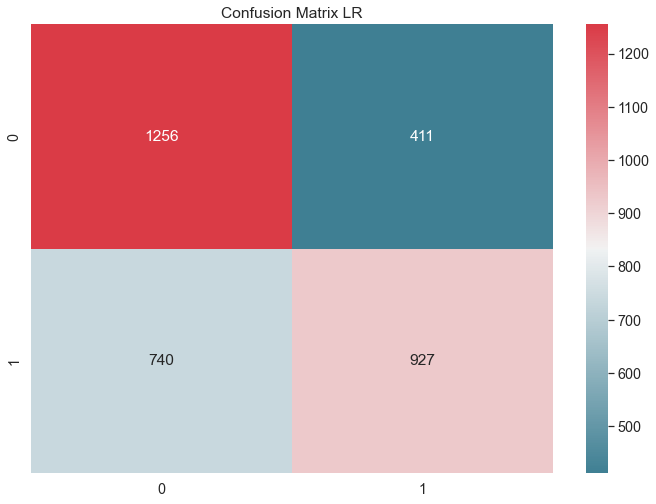

In [79]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(confusion_matrix(conf_mat_list[0], conf_mat_list[1]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix LR")

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix KNN')

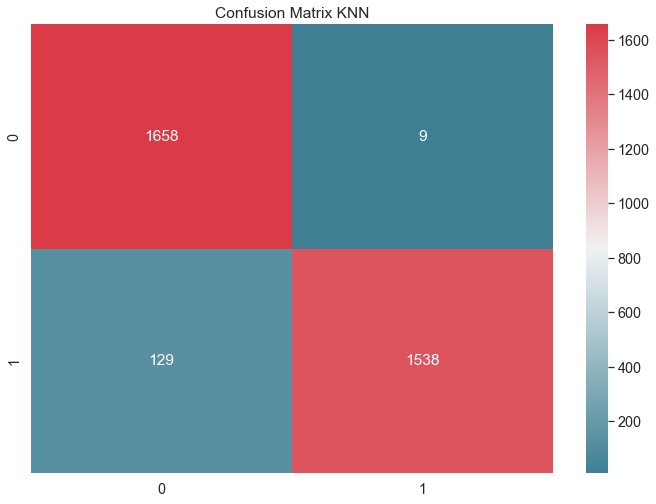

In [80]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(confusion_matrix(conf_mat_list[2], conf_mat_list[3]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix KNN")

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix SVM')

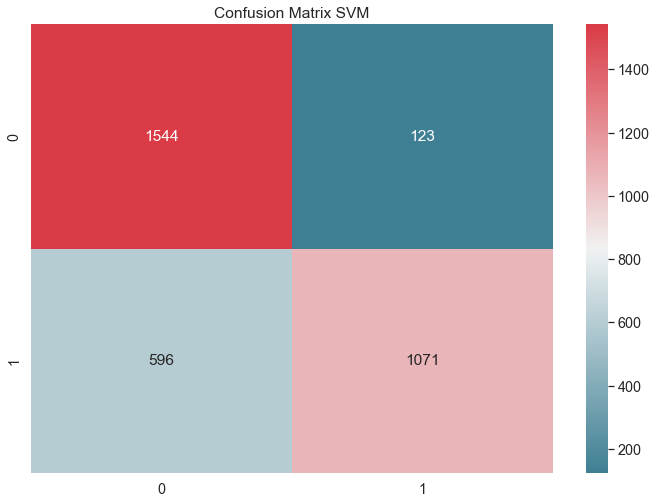

In [81]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(confusion_matrix(conf_mat_list[4], conf_mat_list[5]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix SVM")

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix NB')

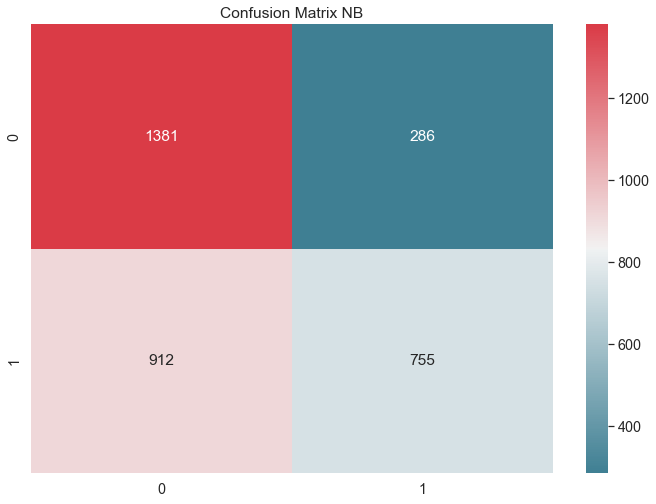

In [82]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(confusion_matrix(conf_mat_list[6], conf_mat_list[7]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix NB")

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix DTree')

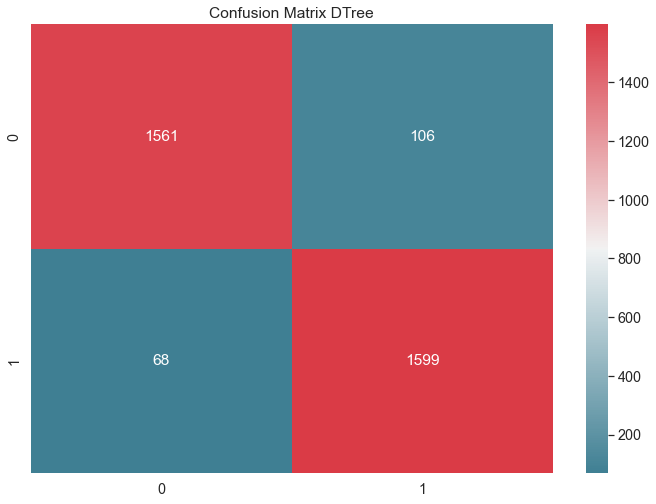

In [83]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(confusion_matrix(conf_mat_list[8], conf_mat_list[9]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix DTree")

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix Random Forest')

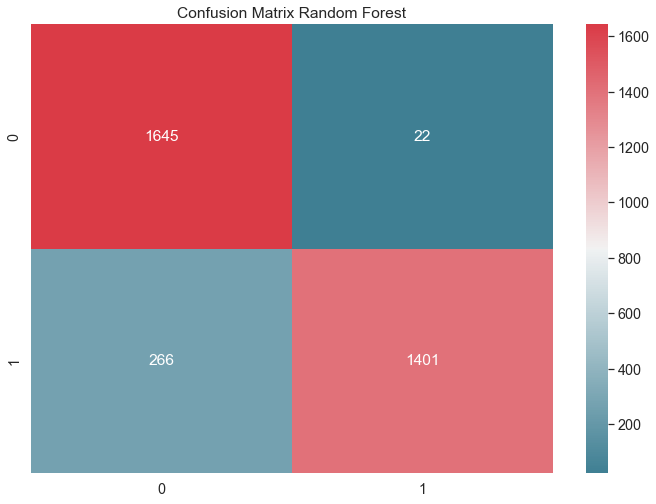

In [84]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(confusion_matrix(conf_mat_list[10], conf_mat_list[11]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix Random Forest")

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix XGBoost')

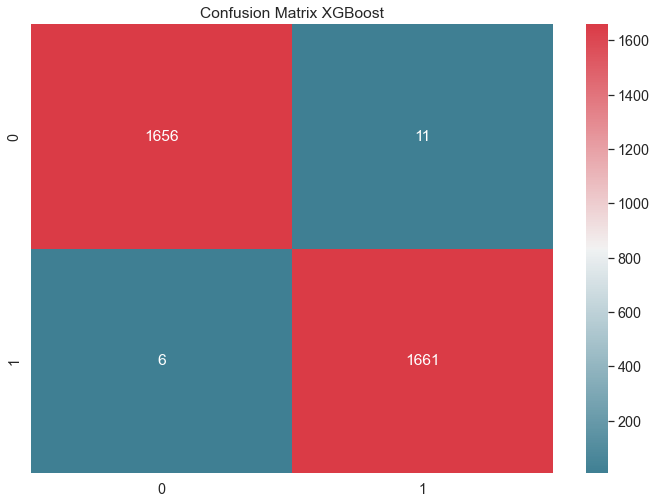

In [85]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(confusion_matrix(conf_mat_list[12], conf_mat_list[13]), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt="d", ax=ax, annot=True)
plt.title("Confusion Matrix XGBoost")

# Performance Matrix

In [86]:
metrics.style.highlight_max(axis=1, color='lightblue').highlight_min(axis=1, color='lightgrey')

,lr,knn,svm,nb,dtree,random_forest,xgb
acc,0.650640,0.960516,0.779689,0.636046,0.955317,0.912935,0.995702
precision,0.691269,0.994433,0.905987,0.727219,0.957730,0.982058,0.993433
recall,0.545386,0.926232,0.624357,0.436030,0.953019,0.841266,0.998001
f1,0.609431,0.959087,0.738940,0.544849,0.955265,0.906184,0.995711
roc-auc,0.699842,0.993631,0.838920,0.684033,0.981816,0.990729,0.999532


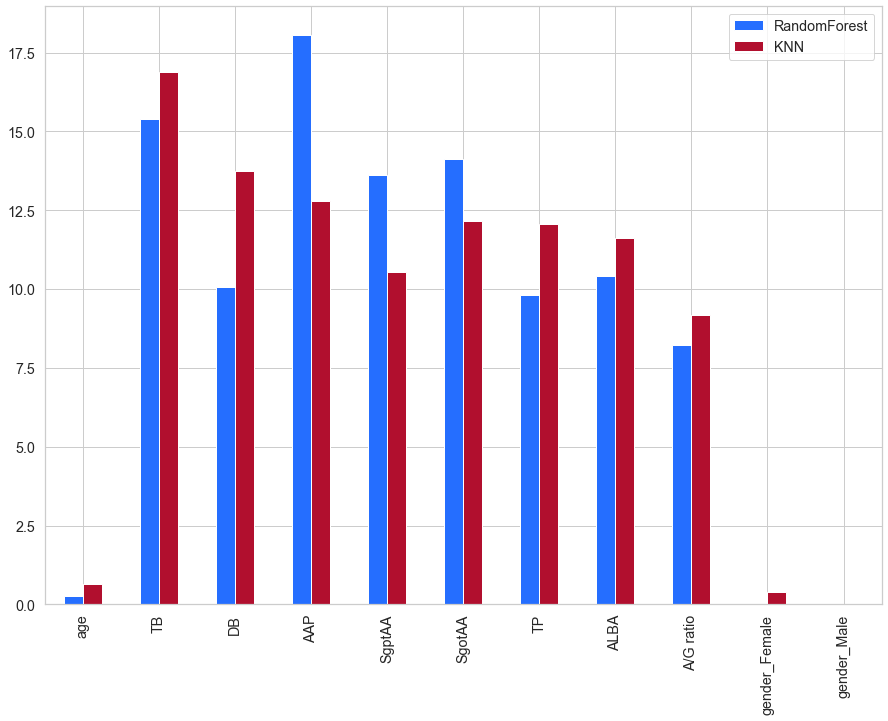

In [87]:
FI = pd.DataFrame({'RandomForest' : list(map(lambda x: x*100, random_forest_gr.feature_importances_)),
                   'KNN' : list(map(lambda x: x*100, xgb_gr.feature_importances_))},
                    index=df_enc.columns)

fig, ax = plt.subplots(figsize=(15,11))
ax = FI.plot.bar(ax=ax)
#ax.set_xlabel('Признак')
#ax.set_ylabel('Важность, %')
plt.show()

In [88]:
df2.head()

,age,gender,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,target
0,65.0,Female,0.7,0.1,187.0,16.000000,18.0,6.8,3.3,0.9,1
3,58.0,Male,1.0,0.4,182.0,14.000000,20.0,6.8,3.4,1.0,1
4,72.0,Male,3.9,2.0,195.0,27.000000,59.0,7.3,2.4,0.4,1
5,46.0,Male,1.8,0.7,208.0,19.000000,14.0,7.6,4.4,1.3,1
6,26.0,Female,0.9,0.2,154.0,38.274569,12.0,7.0,3.5,1.0,1


In [89]:
df2["ALBL"]= (-0.085*df2["ALBA"])+ (0.66*np.log10(df2["TB"]))

In [90]:
df2.head()

,age,gender,TB,DB,AAP,SgptAA,SgotAA,TP,ALBA,A/G ratio,target,ALBL
0,65.0,Female,0.7,0.1,187.0,16.000000,18.0,6.8,3.3,0.9,1,-0.382735
3,58.0,Male,1.0,0.4,182.0,14.000000,20.0,6.8,3.4,1.0,1,-0.289000
4,72.0,Male,3.9,2.0,195.0,27.000000,59.0,7.3,2.4,0.4,1,0.186103
5,46.0,Male,1.8,0.7,208.0,19.000000,14.0,7.6,4.4,1.3,1,-0.205520
6,26.0,Female,0.9,0.2,154.0,38.274569,12.0,7.0,3.5,1.0,1,-0.327700


In [91]:
from sklearn.cluster import KMeans
one=df2[df2['target']==1].index
df3=df2.loc[one]

In [92]:

New_X=df3.iloc[:,[2,8]].values

In [93]:
print(New_X)

[[0.7 3.3]
 [1.  3.4]
 [3.9 2.4]
 ...
 [1.9 1.6]
 [2.2 2.6]
 [1.9 1.6]]


In [94]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(New_X)
    wcss.append(kmeans.inertia_)

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KMeans(n_clusters=11, random_state=42)

KMeans(n_clusters=12, random_state=42)

Text(0.5, 1.0, 'Elbow graph')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

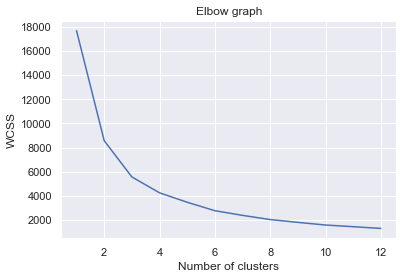

In [95]:
sns.set()
plt.plot(range(1,13),wcss)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
#optimum_cluster=5
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=0)

In [97]:
Y=kmeans.fit_predict(New_X)
df4=Y

In [98]:
plt.figure(figsize=(8,8))
for i in range(0,6):
    print("plt.scatter(New_X[Y==",i,",0] , New_X[Y==",i,",1] , s=50 , c='green', label='Cluster",i+1,"')")

<Figure size 576x576 with 0 Axes>

plt.scatter(New_X[Y== 0 ,0] , New_X[Y== 0 ,1] , s=50 , c='green', label='Cluster 1 ')
plt.scatter(New_X[Y== 1 ,0] , New_X[Y== 1 ,1] , s=50 , c='green', label='Cluster 2 ')
plt.scatter(New_X[Y== 2 ,0] , New_X[Y== 2 ,1] , s=50 , c='green', label='Cluster 3 ')
plt.scatter(New_X[Y== 3 ,0] , New_X[Y== 3 ,1] , s=50 , c='green', label='Cluster 4 ')
plt.scatter(New_X[Y== 4 ,0] , New_X[Y== 4 ,1] , s=50 , c='green', label='Cluster 5 ')
plt.scatter(New_X[Y== 5 ,0] , New_X[Y== 5 ,1] , s=50 , c='green', label='Cluster 6 ')


<Figure size 576x576 with 0 Axes>

plt.scatter(New_X[Y== 0 ,0] , New_X[Y== 0 ,1] ,New_X[Y== 0 ,2] , New_X[Y== 0 ,3], New_X[Y== 0 ,4] , New_X[Y== 0 ,5], New_X[Y== 0 ,6] , New_X[Y== 0 ,7] , s=50 ,c='green', label='Cluster 1')
plt.scatter(New_X[Y== 1 ,0] , New_X[Y== 1 ,1] ,New_X[Y== 1 ,2] , New_X[Y== 1 ,3], New_X[Y== 1 ,4] , New_X[Y== 1 ,5], New_X[Y== 1 ,6] , New_X[Y== 1 ,7] , s=50 ,c='green', label='Cluster 2')
plt.scatter(New_X[Y== 2 ,0] , New_X[Y== 2 ,1] ,New_X[Y== 2 ,2] , New_X[Y== 2 ,3] ,New_X[Y== 2 ,4] , New_X[Y== 2 ,5], New_X[Y== 2 ,6] , New_X[Y== 2 ,7] ,s=50 ,c='green', label='Cluster 3')
plt.scatter(New_X[Y== 3 ,0] , New_X[Y== 3 ,1] ,New_X[Y== 3 ,2] , New_X[Y== 3 ,3] ,New_X[Y== 3 ,4] , New_X[Y== 3 ,5], New_X[Y== 3 ,6] , New_X[Y== 3 ,7] , s=50 ,c='green', label='Cluster 4')
plt.scatter(New_X[Y== 4 ,0] , New_X[Y== 4 ,1] ,New_X[Y== 4 ,2] , New_X[Y== 4 ,3] ,New_X[Y== 4 ,4] , New_X[Y== 4 ,5], New_X[Y== 4 ,6] , New_X[Y== 4 ,7] , s=50 ,c='green', label='Cluster 5')

[3.13792678 0.99827653]
[2.7032678  3.28242731]


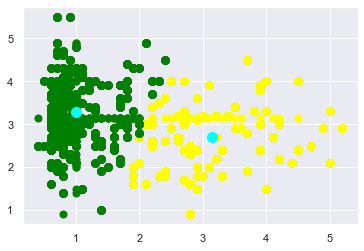

In [99]:
plt.scatter(New_X[Y== 0 ,0] , New_X[Y== 0 ,1] , s=50 , c='yellow', label='Cluster 1 ')
plt.scatter(New_X[Y== 1 ,0] , New_X[Y== 1 ,1] , s=50 , c='green', label='Cluster 2 ')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='cyan',label="Centroids")
one_center=kmeans.cluster_centers_[:,0]
two_center= kmeans.cluster_centers_[:,1]
print(one_center)
print(two_center)
#plt.scatter(New_X[Y== 2 ,0] , New_X[Y== 2 ,1] , s=50 , c='red', label='Cluster 3 ')
#plt.scatter(New_X[Y== 3 ,0] , New_X[Y== 3 ,1] , s=50 , c='blue', label='Cluster 4 ')
#plt.scatter(New_X[Y== 4 ,0] , New_X[Y== 4 ,1] , s=50 , c='black', label='Cluster 5 ')

In [100]:
one_center=kmeans.cluster_centers_[:,0]
two_center= kmeans.cluster_centers_[:,1]
print(one_center)
print(two_center)

[3.13792678 0.99827653]
[2.7032678  3.28242731]


In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage


{'icoord': [[295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [255.0, 255.0, 274.375, 274.375],
  [245.0, 245.0, 264.6875, 264.6875],
  [235.0, 235.0, 254.84375, 254.84375],
  [225.0, 225.0, 244.921875, 244.921875],
  [215.0, 215.0, 234.9609375, 234.9609375],
  [205.0, 205.0, 224.98046875, 224.98046875],
  [195.0, 195.0, 214.990234375, 214.990234375],
  [185.0, 185.0, 204.9951171875, 204.9951171875],
  [175.0, 175.0, 194.99755859375, 194.99755859375],
  [165.0, 165.0, 184.998779296875, 184.998779296875],
  [155.0, 155.0, 174.9993896484375, 174.9993896484375],
  [145.0, 145.0, 164.99969482421875, 164.99969482421875],
  [135.0, 135.0, 154.99984741210938, 154.99984741210938],
  [125.0, 125.0, 144.9999237060547, 144.9999237060547],
  [115.0, 115.0, 134.99996185302734, 134.99996185302734],
  [105.0, 105.0, 124.99998092651367, 124.99998092651367],
  [95.0, 95.0, 114.99999046325684, 114.99999046325684],
  [85.0, 8

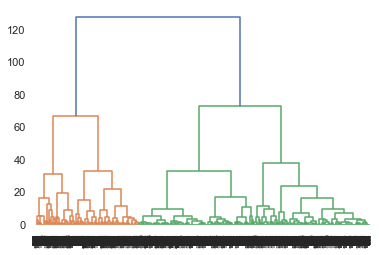

In [102]:
linkage_data = linkage(New_X, method='ward', metric='euclidean')
dendrogram(linkage_data)

In [103]:
from sklearn.cluster import AgglomerativeClustering


hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(New_X)
print(labels)


[0 0 1 ... 1 1 1]


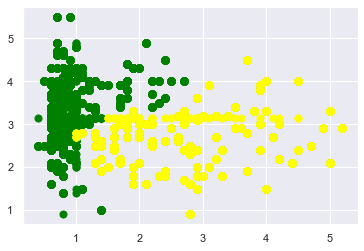

In [104]:
Y=labels
plt.scatter(New_X[Y== 0 ,0] , New_X[Y== 0 ,1] , s=50 , c='green', label='Cluster 1 ')
plt.scatter(New_X[Y== 1 ,0] , New_X[Y== 1 ,1] , s=50 , c='yellow', label='Cluster 2 ')